In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

# Defining custom transmission function

Host-host transmission model with susceptible and infected hosts in a single
population scenario, illustrating pathogen evolution through independent
reassortment/segregation of chromosomes, increased transmissibility,
and intra-host competition.

When two pathogens with different genomes meet in the same host (or vector),
the pathogen with the most fit genome has a higher probability of being
transmitted to another host (or vector). In this case, the transmission rate
DOES vary according to genome, with more fit genomes having a higher
transmission rate. Once an event occurs, the pathogen with higher fitness also
has a higher likelihood of being transmitted.

Here, we define a landscape of stabilizing selection where there is an optimal
genome and every other genome is less fit, but fitness functions can be defined
in any arbitrary way (accounting for multiple peaks, for instance, or special
cases for a specific genome sequence).

### Creating a new Model object

In [2]:
model = Model()

### Defining an optimal genome
`/` denotes separators between different chromosomes, which are segregated and recombined independently of each other (this model has no recombination).

In [3]:
my_optimal_genome = 'BEST/BEST/BEST/BEST'

### Defining a custom fitness function for the host
Fitness functions must take in 1 argument and return a positive number as a fitness value. Here, we take advantage of one of the preset functions, but you can define it any way you want!

Stabilizing selection: any deviation from the "optimal genome" sequence results in an exponential decay in fitness to the min_fitness value at the maximum possible distance. Here we use strong selection, with a very low minimum fitness

In [4]:
def myHostFitness(genome):
    return Model.peakLandscape(
        genome, 
        peak_genome=my_optimal_genome, 
        min_value=1e-10
        )

### Defining a custom transmission function for the host
**Stabilizing selection:** any deviation from the "optimal genome" sequence 1/20 of the fitness of the optimal genome. There is no middle ground between the optimal and the rest, in this case.

In [5]:
def myHostContact(genome):
    return 1 if genome == my_optimal_genome else 0.05

### Defining our Setup

In [6]:
model.newSetup(         # Create a new setup dictionary
    'my_setup', 
    preset='host-host', 
    # Use default host-host parameters.
    possible_alleles='ABDEST',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=len(my_optimal_genome),
        # Define length of "genome", or total number of alleles.
    contact_rate_host_host = 2e0,
    contactHost=myHostContact,
        # Assign the contact function we created (could be a lambda function)
    fitnessHost=myHostFitness,
        # Assign the fitness function we created (could be a lambda function)
    recombine_in_host=1e-3,
        # Modify "recombination" rate of pathogens when in host to get some
        # evolution! This can either be independent segregation of chromosomes
        # (equivalent to reassortment), recombination of homologous chromosomes,
        # or a combination of both.
    num_crossover_host=0
        # By specifying the average number of crossover events that happen
        # during recombination to be zero, we ensure that "recombination" is
        # restricted to independent segregation of chromosomes (separated by
        # "/").
    )

### Creating a population in our model

In [7]:
model.newPopulation('my_population','my_setup',num_hosts=100)

In [8]:
model.addPathogensToHosts( 'my_population',{'BEST/BADD/BEST/BADD':10} )
    # We will start off the simulation with a suboptimal pathogen genome,
    # Throughout the course of the simulation, we should see this genome
    # be outcompeted by more optimal pathogen genotypes, culminating in the
    # optimal genome, which outcompetes all others.

In [9]:
model.addPathogensToHosts( 'my_population',{'BADD/BEST/BADD/BEST':10} )
    # We will start off the simulation with a second suboptimal pathogen genome,
    # Throughout the course of the simulation, we should see this genome
    # be outcompeted by more optimal pathogen genotypes, culminating in the
    # optimal genome, which outcompetes all others.

In [10]:
model.run(0,500,time_sampling=100)

Simulating time: 500 END


In [11]:
data = model.saveToDataFrame('transmissibility_function_reassortment_example.csv')

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


...file saved.


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.3s finished


1 / 2 genotypes processed.
2 / 2 genotypes processed.


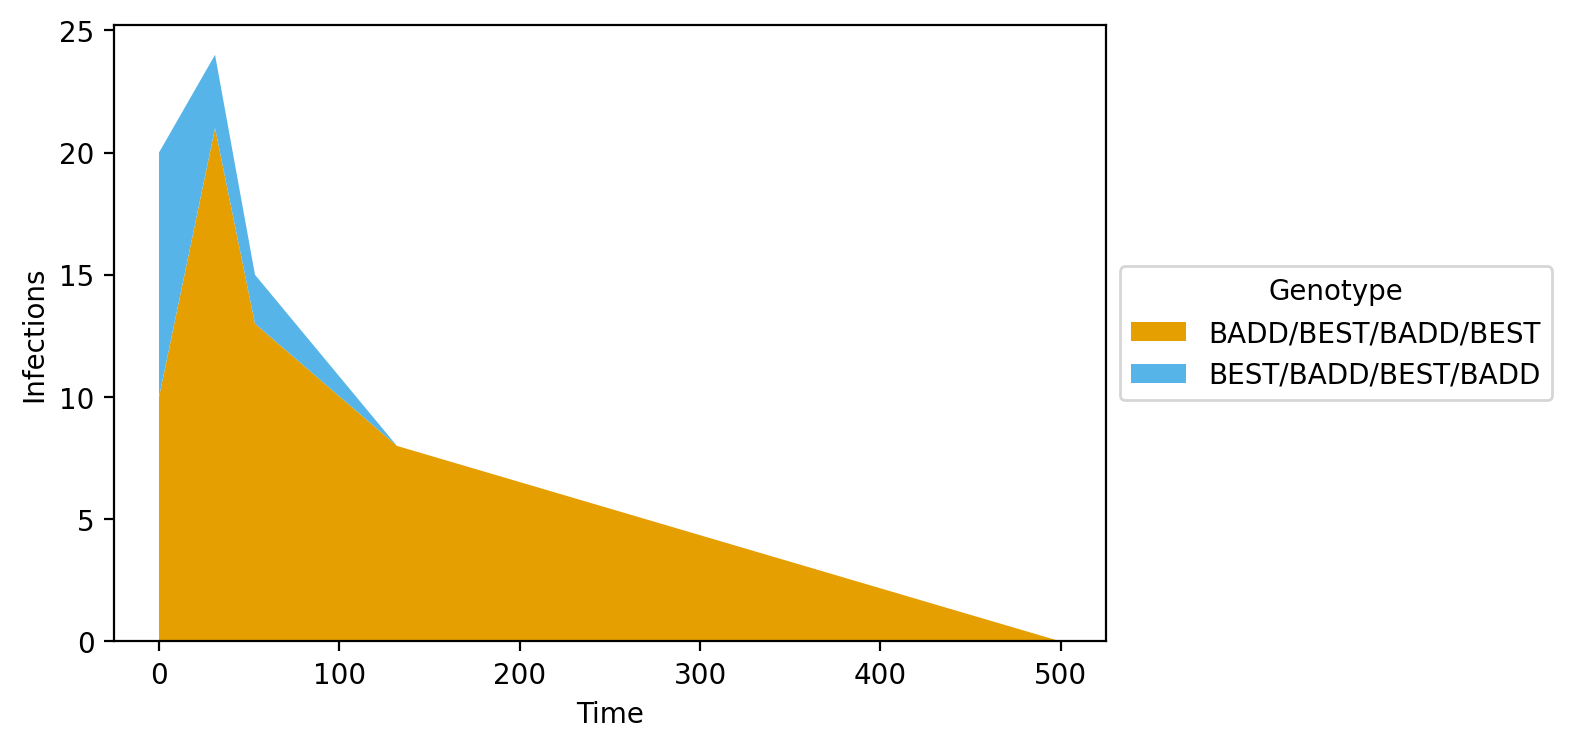

In [12]:
graph_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'transmissibility_function_reassortment_example_composition.png', data
    )

/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


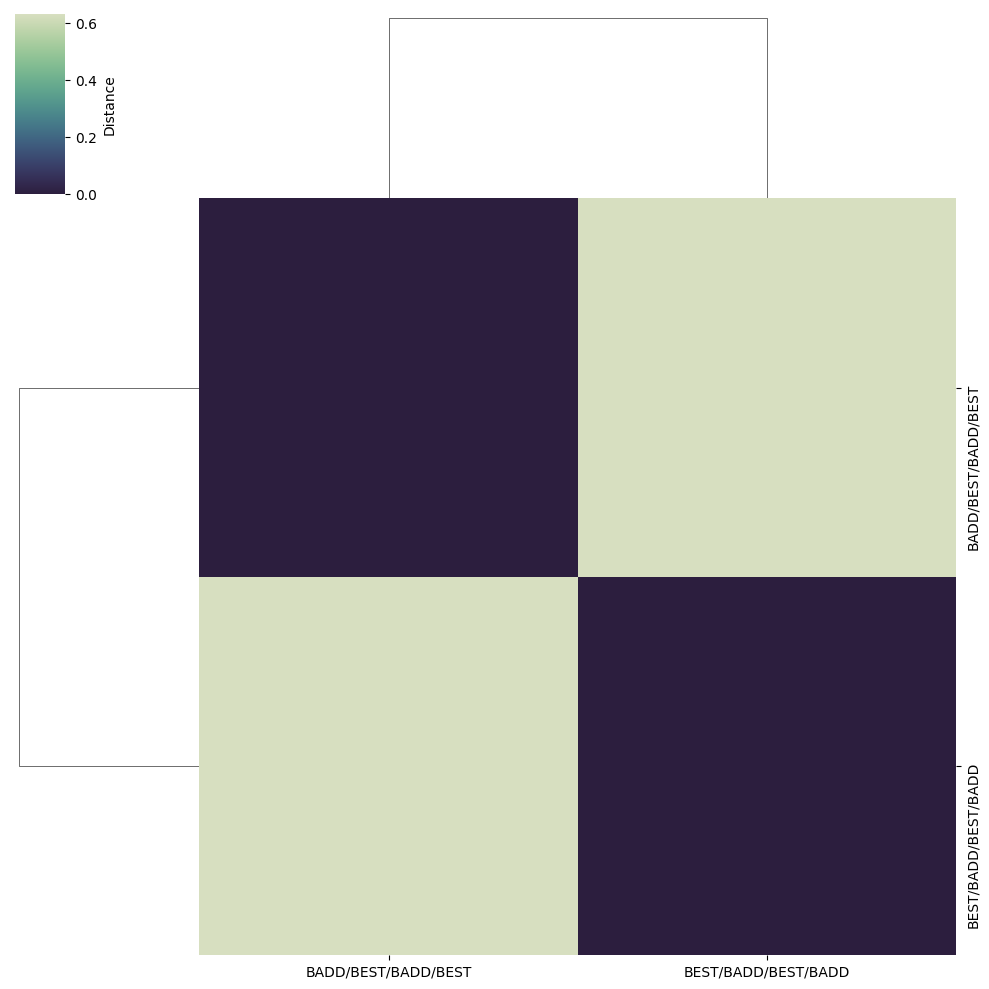

In [13]:
graph_clustermap = model.clustermap(
    'transmissibility_function_reassortment_example_clustermap.png', data,
    save_data_to_file='transmissibility_function_reassortment_example_pairwise_distances.csv',
    num_top_sequences=24
    )
    # Generate a heatmap and dendrogram for the top 24 genomes. Besides creating
    # the plot, outputs the pairwise distance matrix to a csv file as well.

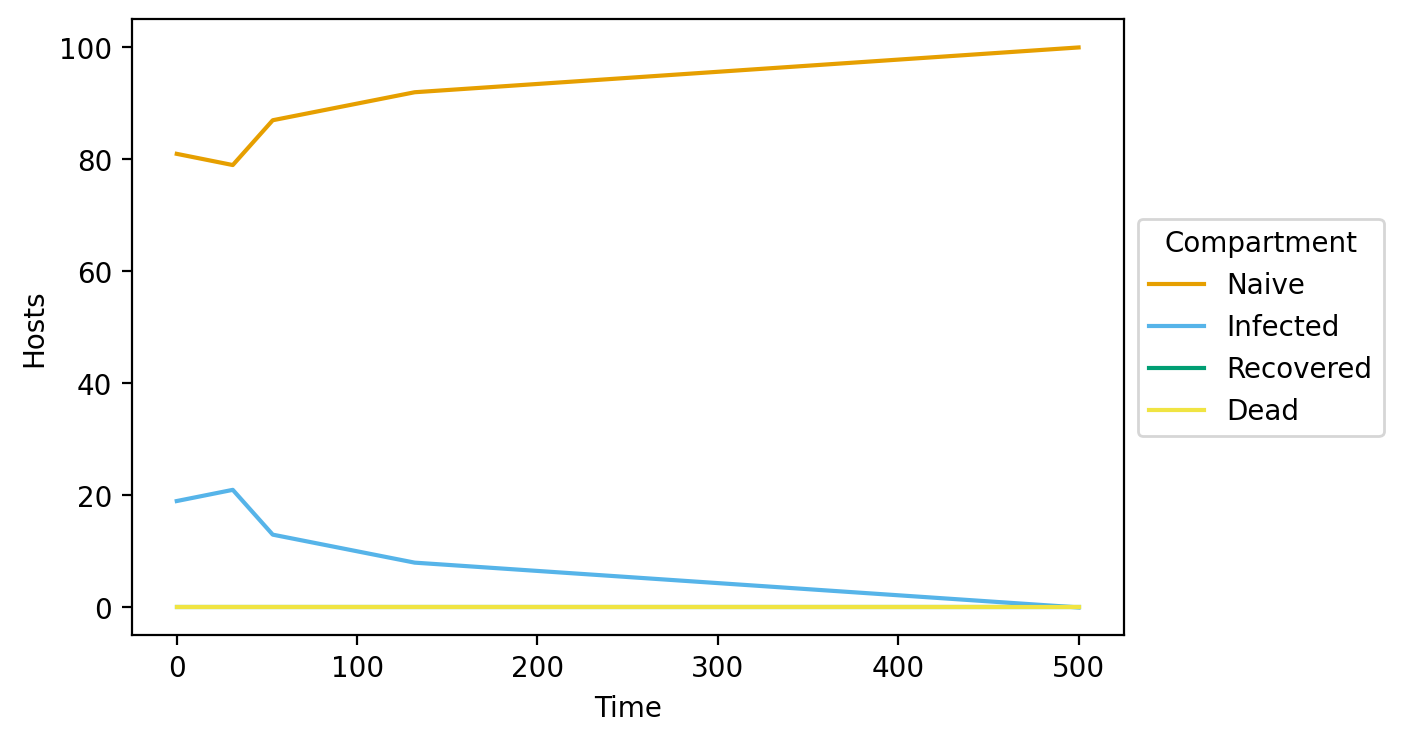

In [14]:
graph_compartments = model.compartmentPlot(
    'transmissibility_function_reassortment_example_compartments.png', data
    )
    # Also generate a normal compartment plot. Notice the total number of
    # infections in the composition plot can exceed the number of infected hosts
    # in the compartment plot. This happens because a single host infected by
    # multiple genotypes is counted twice in the former, but not the latter.